# Tutorial of tpfi

In this notebook, we will demonstrate how to use the main functions in `tpfi` to visualize target pixel files and their corresponding sky charts.

In [1]:
%matplotlib inline
import lightkurve as lk
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import tpfi
from tpfi import plot_identification, plot_season, plot_sky, plot_tpf

print(tpfi.__version__)

1.2.2


## Using `plot_identification`

The `plot_identification` function allows you to visualize a target pixel file and its corresponding sky chart. Here's an example of how to use it:

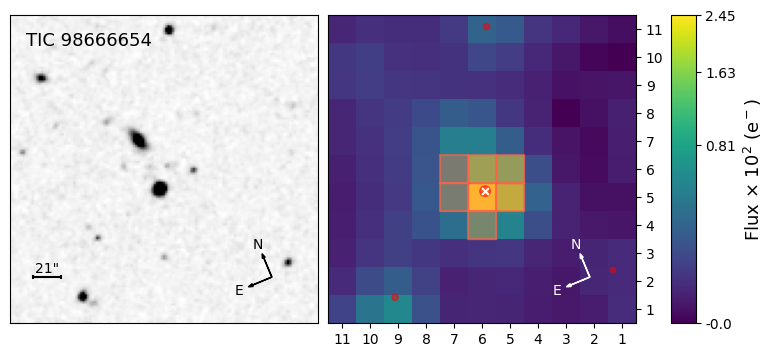

In [2]:
# Create a TPF object using lightkurve
# See https://docs.lightkurve.org/reference/api/lightkurve.search_targetpixelfile.html for details

tpf = lk.search_targetpixelfile("TIC98666654", sector=3, exptime=120, author="SPOC").download()

# Plot identification chart of the TPF
plot_identification(tpf)

You can increase the `mag_limit` parameter to show more stars in the right panel (default `mag_limit=18` for TESS, `mag_limit=19.5` for Kepler/K2), or decrease it to show less stars. The `frame` parameter can be used to specify the frame of the TPF to be plotted (default use the median flux of all frames).

Most colors of the elements in the identification chart can be customized. For example, the cmap of the right panel can be customized by the `cmap` parameter, and the color of the stars and the pipeline mask can also be customized by the `c_star` and `c_mask` parameter separately.

The label of the target in the left panel can be turned off by setting `show_label=False`, and the tick labels of the TPF can be turned off by setting `show_ticklabels=False`.

You can also set `verbose=True` to show more information.

Querying Sky Image from DSS2 Red...
Target Gaia Source DR3 ID: 2362319737507190528


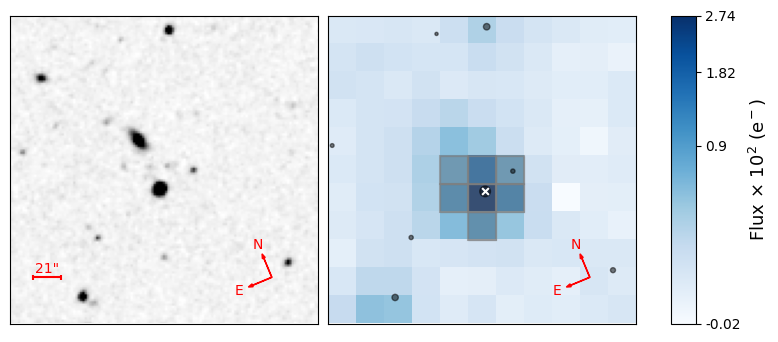

In [3]:
plot_identification(
    tpf,
    mag_limit=20,
    frame=0,
    cmap="Blues",
    c_star="k",
    c_mask="grey",
    c_arrow_tpf="r",
    c_arrow_sky="r",
    c_scale="r",
    show_label=False,
    show_ticklabels=False,
    verbose=True,
)

Besides, you can set the `ax` parameter to specify a matplotlib axes object to plot into.

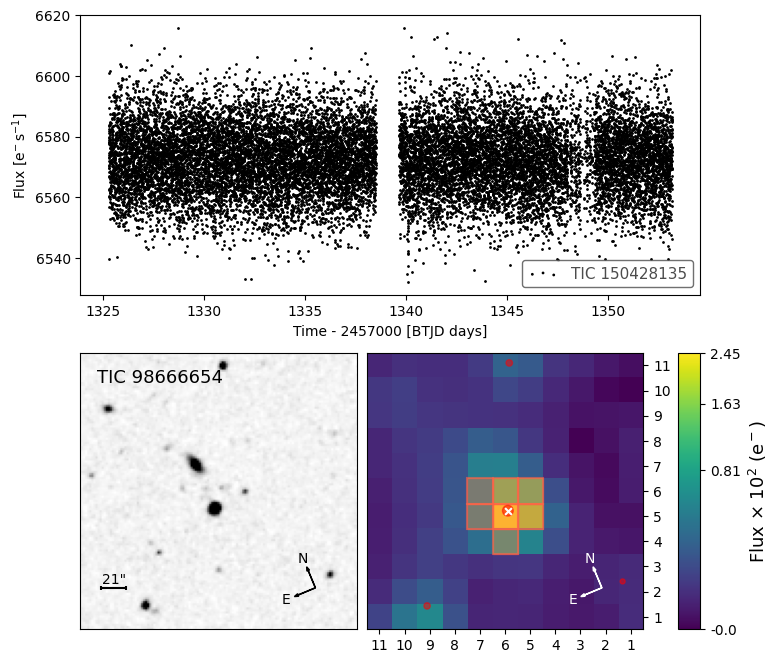

In [4]:
lc = lk.search_lightcurve("TIC150428135", sector=1, exptime=120, author="SPOC").download()

_, axes = plt.subplots(2, 1, figsize=(8, 8))
lc.scatter(ax=axes[0], c="k")
plot_identification(tpf, ax=axes[1])

## Using `plot_sky` and `plot_tpf`

If you want to plot the sky chart and the TPF separately, you can use the `plot_sky` and `plot_tpf` functions. Here's an example of how to use them:

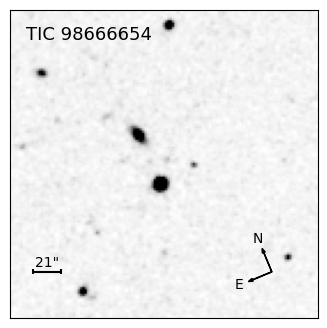

In [5]:
plot_sky(tpf)

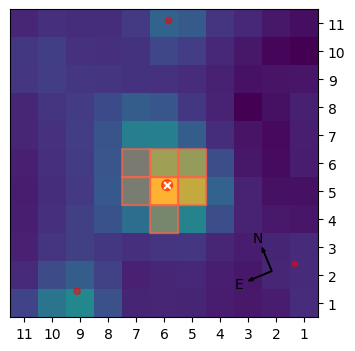

In [6]:
plot_tpf(tpf)

And you can also customize the `mag_limit`, `cmap`, `c_star`, `c_mask`, `verbose` and `ax` parameters.

Querying Sky Image from DSS2 Red...
Querying Sky Image from DSS2 Red failed. Retry with DSS2 NIR...
Target Gaia Source DR3 ID: 2362319737507190528


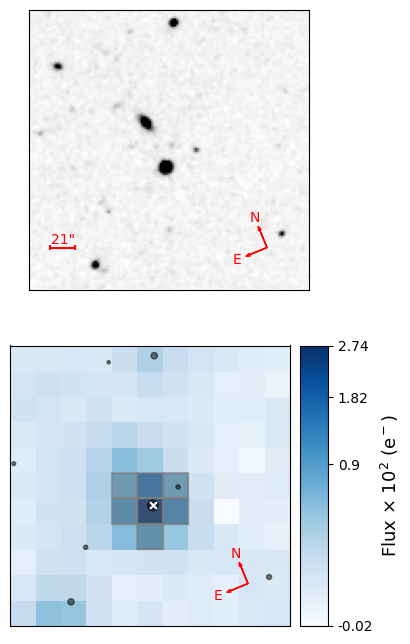

In [7]:
_, axes = plt.subplots(2, 1, figsize=(8, 8))
divider = make_axes_locatable(axes[1])
ax_cb = divider.append_axes("right", size="10%", pad=0.1)

plot_sky(tpf, ax=axes[0], c_arrow="r", c_scale="r", show_label=False, verbose=True)
plot_tpf(
    tpf,
    ax=axes[1],
    mag_limit=20,
    frame=0,
    cmap="Blues",
    c_star="k",
    c_mask="grey",
    c_arrow="r",
    show_ticklabels=False,
    ax_cb=ax_cb,
    verbose=True,
)

## Using `plot_season`

The `plot_season` function allows you to visualize the TPFs of a Kepler target from different seasons. Here's an example of how to use it:

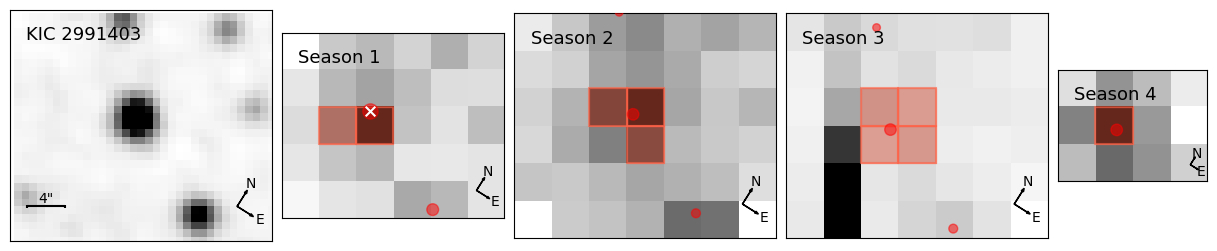

In [8]:
plot_season("KIC2991403")

You can change `mag_limit`, `cmap`, `c_star`, `c_mask`, `verbose` and `ax` similar to the `plot_identification` function.

Found 4 seasons
Querying Sky Image from DSS2 Red...
Querying Sky Image from DSS2 Red failed. Retry with DSS2 NIR...
Target Gaia Source DR3 ID: 2052662903395436672


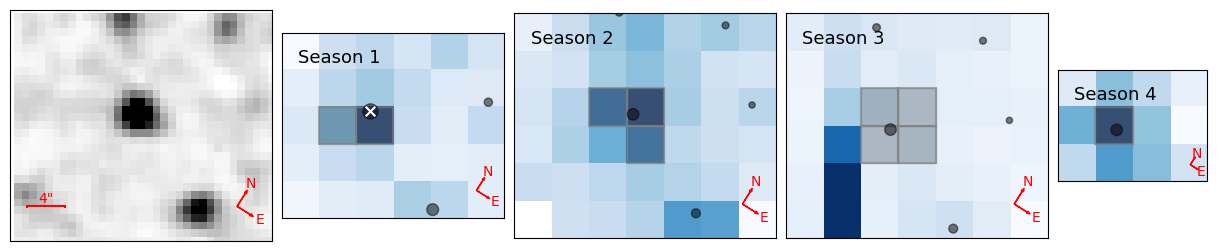

In [9]:
plot_season(
    "KIC2991403",
    mag_limit=20,
    cmap="Blues",
    c_star="k",
    c_mask="grey",
    c_arrow_sky="r",
    c_arrow_tpf="r",
    c_scale="r",
    show_label=False,
    verbose=True,
)